In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malaria/data/data2.yaml
/kaggle/input/malaria/data/data.yaml
/kaggle/input/malaria/data/labels/val/image-589.txt
/kaggle/input/malaria/data/labels/val/frame_4930.txt
/kaggle/input/malaria/data/labels/val/frame_12499.txt
/kaggle/input/malaria/data/labels/val/frame_8700.txt
/kaggle/input/malaria/data/labels/val/frame_6061.txt
/kaggle/input/malaria/data/labels/val/frame_15515.txt
/kaggle/input/malaria/data/labels/val/frame_18821.txt
/kaggle/input/malaria/data/labels/val/image-406.txt
/kaggle/input/malaria/data/labels/val/frame_22504.txt
/kaggle/input/malaria/data/labels/val/frame_12760.txt
/kaggle/input/malaria/data/labels/val/frame_31175.txt
/kaggle/input/malaria/data/labels/val/image-185.txt
/kaggle/input/malaria/data/labels/val/frame_18589.txt
/kaggle/input/malaria/data/labels/val/frame_8265.txt
/kaggle/input/malaria/data/labels/val/frame_20300.txt
/kaggle/input/malaria/data/labels/val/frame_5104.txt
/kaggle/input/malaria/data/labels/val/frame_609.txt
/kaggle/input/malari

In [2]:
### 2. Define root directory ###

ROOT_DIR = '/kaggle/input/malaria/data'

In [3]:
### 3. Install Ultralytics ###

!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 16.1 MB/s eta 0:00:00a 0:00:01


In [4]:
### 4. Train model ###

import os

from ultralytics import YOLO


# Load a model
model = YOLO("yolov8n.pt")  # load pre trained model

# Entraînement avec les paramètres spécifiés
results = model.train(
    data=os.path.join(ROOT_DIR, "data2.yaml"),  # chemin du fichier YAML
    epochs=100,            # nombre d'époques
    imgsz=640,          # taille d'image
    patience=100,          # patience pour l'arrêt précoce
    cache=None,            # pas de mise en cache des images
    batch=-1      # taille de lot automatique en fonction de l'appareil
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 73.7MB/s]


Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/malaria/data/data2.yaml, epochs=100, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=None, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 14.0MB/s]
2024-11-11 08:05:19,872	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-11 08:05:20,487	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 64.5MB/s]


AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.10G reserved, 0.06G allocated, 14.58G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3011433       8.196         0.191         58.94         252.4        (1, 3, 640, 640)                    list
     3011433       16.39         0.298         25.11         54.48        (2, 3, 640, 640)                    list
     3011433       32.79         0.537         27.59         60.74        (4, 3, 640, 640)                    list
     3011433       65.57         0.977         30.25         57.22        (8, 3, 640, 640)                    list
     3011433       131.1         1.902         56.45         73.13       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 76 for CUDA:0 8.91G/14.74G (60%) ✅


train: Scanning /kaggle/input/malaria/data/labels/train... 893 images, 126 backgrounds, 0 corrupt: 100%|██████████| 1019/1019 [00:04<00:00, 203.91it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/malaria/data/labels is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/malaria/data/labels/val... 249 images, 42 backgrounds, 0 corrupt: 100%|██████████| 291/291 [00:01<00:00, 188.76it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/malaria/data/labels is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00059375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.75G      1.838      4.484      1.081        142        640: 100%|██████████| 14/14 [00:39<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.16s/it]

                   all        291        910    0.00558      0.372    0.00638    0.00367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.94G        1.4      2.108     0.9182        164        640: 100%|██████████| 14/14 [00:26<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all        291        910    0.00688      0.422    0.00749    0.00457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.83G      1.257      1.579     0.8976        120        640: 100%|██████████| 14/14 [00:29<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all        291        910    0.00373      0.217    0.00304    0.00187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.77G      1.248      1.378     0.8919        209        640: 100%|██████████| 14/14 [00:31<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        291        910    0.00174     0.0986    0.00795    0.00414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.77G      1.263      1.339      0.893        126        640: 100%|██████████| 14/14 [00:31<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        291        910      0.982      0.189      0.415      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.51G      1.225      1.247     0.8879        155        640: 100%|██████████| 14/14 [00:30<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        291        910     0.0704      0.353      0.074     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.96G       1.23      1.134     0.9027        192        640: 100%|██████████| 14/14 [00:31<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        291        910      0.942      0.349      0.469      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.87G      1.175      1.028     0.8818        160        640: 100%|██████████| 14/14 [00:30<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        291        910      0.554       0.42       0.53      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.91G      1.189     0.9812     0.8894        114        640: 100%|██████████| 14/14 [00:31<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        291        910      0.553      0.544      0.591      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.68G      1.183      0.936     0.8862        164        640: 100%|██████████| 14/14 [00:28<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        291        910      0.946      0.464      0.597      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.85G      1.159     0.9125     0.8834        195        640: 100%|██████████| 14/14 [00:30<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        291        910      0.457      0.627      0.591       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.89G      1.171     0.8791     0.8758        146        640: 100%|██████████| 14/14 [00:31<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        291        910      0.517      0.639      0.642      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.88G      1.155     0.8655     0.8794        156        640: 100%|██████████| 14/14 [00:30<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        291        910      0.615      0.679      0.637      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.69G      1.155     0.8131     0.8824        134        640: 100%|██████████| 14/14 [00:30<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        291        910      0.612      0.682      0.653      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.89G      1.142      0.798     0.8756        136        640: 100%|██████████| 14/14 [00:30<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        291        910      0.611      0.615      0.651      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.65G      1.126     0.7648      0.872        126        640: 100%|██████████| 14/14 [00:28<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        291        910      0.644      0.737       0.69      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.81G      1.115     0.7571     0.8745        121        640: 100%|██████████| 14/14 [00:31<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        291        910      0.652      0.718      0.681      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.79G      1.109     0.7236     0.8758        153        640: 100%|██████████| 14/14 [00:26<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        291        910      0.645      0.712      0.687      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.62G      1.113     0.7313     0.8698        132        640: 100%|██████████| 14/14 [00:25<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        291        910      0.579      0.678      0.669      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.97G       1.11     0.7292     0.8599        150        640: 100%|██████████| 14/14 [00:23<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        291        910      0.715      0.543      0.609      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.87G      1.116     0.7094     0.8699        121        640: 100%|██████████| 14/14 [00:24<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        291        910      0.627      0.563      0.595      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.2G      1.104     0.6859     0.8746        155        640: 100%|██████████| 14/14 [00:25<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        291        910      0.613      0.624      0.654      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.71G      1.077     0.6814     0.8635        165        640: 100%|██████████| 14/14 [00:27<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        291        910      0.516      0.626      0.648      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.81G      1.096     0.6948     0.8676        151        640: 100%|██████████| 14/14 [00:29<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        291        910       0.54      0.672       0.68      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.76G      1.077     0.6737     0.8684        160        640: 100%|██████████| 14/14 [00:30<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        291        910      0.561      0.683      0.677      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.75G      1.056     0.6547     0.8623        178        640: 100%|██████████| 14/14 [00:29<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        291        910      0.676       0.72      0.698      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      9.64G      1.107     0.6863     0.8638        119        640: 100%|██████████| 14/14 [00:30<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        291        910      0.672      0.744      0.724      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.78G      1.076     0.6398     0.8603        125        640: 100%|██████████| 14/14 [00:29<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        291        910      0.635      0.705      0.672      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.87G       1.06     0.6474     0.8559        202        640: 100%|██████████| 14/14 [00:26<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        291        910        0.7      0.607      0.675      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.89G      1.059      0.653     0.8604        133        640: 100%|██████████| 14/14 [00:28<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        291        910      0.675      0.756      0.711      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.71G      1.083     0.6519     0.8664        152        640: 100%|██████████| 14/14 [00:24<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        291        910      0.606      0.675      0.686      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.68G      1.115     0.6791     0.8658        152        640: 100%|██████████| 14/14 [00:25<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        291        910      0.732      0.784      0.769      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.83G      1.059     0.6401     0.8609        144        640: 100%|██████████| 14/14 [00:25<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        291        910      0.628      0.671      0.672       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.85G      1.057     0.6381     0.8571        125        640: 100%|██████████| 14/14 [00:25<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all        291        910      0.616      0.735      0.683       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.66G      1.041     0.6217      0.859        165        640: 100%|██████████| 14/14 [00:25<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        291        910      0.704      0.731      0.737      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.66G      1.037     0.6264     0.8516        124        640: 100%|██████████| 14/14 [00:26<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        291        910        0.7      0.755      0.707      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.49G      1.035     0.6146     0.8573        162        640: 100%|██████████| 14/14 [00:26<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        291        910      0.679      0.782      0.746      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      10.3G      1.039     0.6074     0.8564        123        640: 100%|██████████| 14/14 [00:29<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        291        910      0.705      0.744      0.738      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.71G      1.044     0.6266     0.8564        167        640: 100%|██████████| 14/14 [00:28<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        291        910      0.718      0.761      0.738      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      10.3G       1.02     0.5936     0.8516        171        640: 100%|██████████| 14/14 [00:29<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        291        910      0.691      0.769      0.745       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.66G      1.047     0.6063      0.853        134        640: 100%|██████████| 14/14 [00:30<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        291        910      0.734      0.762      0.758      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.65G      1.016     0.5884     0.8542        100        640: 100%|██████████| 14/14 [00:24<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all        291        910      0.697      0.795      0.772      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.85G      1.021     0.5911     0.8573        171        640: 100%|██████████| 14/14 [00:28<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all        291        910      0.729      0.764      0.756      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.71G      1.024     0.6087     0.8555        135        640: 100%|██████████| 14/14 [00:29<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        291        910      0.667      0.764      0.723      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.64G      1.001     0.6066     0.8482        136        640: 100%|██████████| 14/14 [00:26<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        291        910      0.745      0.773      0.788      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.76G      1.023     0.5908     0.8542        189        640: 100%|██████████| 14/14 [00:25<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all        291        910      0.712      0.746       0.72      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.78G      1.025     0.5801      0.855        101        640: 100%|██████████| 14/14 [00:28<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        291        910      0.735      0.733       0.76      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.91G      1.025     0.5883     0.8545        151        640: 100%|██████████| 14/14 [00:29<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        291        910      0.739      0.722      0.758      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.76G      1.007     0.5751     0.8515        153        640: 100%|██████████| 14/14 [00:29<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        291        910      0.673      0.752      0.758      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.85G      1.005     0.5666     0.8448        180        640: 100%|██████████| 14/14 [00:30<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        291        910      0.712      0.756      0.776      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      9.85G     0.9937     0.5616     0.8531        129        640: 100%|██████████| 14/14 [00:29<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        291        910      0.736      0.717      0.752      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.72G      1.013     0.5654     0.8495        145        640: 100%|██████████| 14/14 [00:30<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        291        910      0.769        0.7      0.757      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.2G     0.9793     0.5509     0.8449        133        640: 100%|██████████| 14/14 [00:29<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        291        910      0.744      0.795      0.784      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.64G     0.9915     0.5647     0.8462        125        640: 100%|██████████| 14/14 [00:29<00:00,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        291        910      0.724      0.791       0.77      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.62G     0.9903     0.5572     0.8507        184        640: 100%|██████████| 14/14 [00:29<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        291        910      0.679      0.699      0.737      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      9.52G     0.9816     0.5569      0.847        164        640: 100%|██████████| 14/14 [00:27<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        291        910      0.742      0.788      0.784      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      9.81G     0.9817     0.5523     0.8419        145        640: 100%|██████████| 14/14 [00:29<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        291        910      0.734      0.785      0.768      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.89G     0.9811     0.5524     0.8492        163        640: 100%|██████████| 14/14 [00:29<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        291        910      0.751      0.784      0.784      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.73G      0.985     0.5549     0.8454        151        640: 100%|██████████| 14/14 [00:29<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        291        910      0.726      0.763      0.746      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.89G      0.968      0.525     0.8433        132        640: 100%|██████████| 14/14 [00:30<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        291        910       0.69      0.761      0.759      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      9.73G     0.9704     0.5309     0.8476        179        640: 100%|██████████| 14/14 [00:32<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all        291        910      0.749      0.808      0.806      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.91G     0.9711     0.5347     0.8496        152        640: 100%|██████████| 14/14 [00:29<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all        291        910      0.758      0.772      0.797      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.67G      0.955     0.5322     0.8426        128        640: 100%|██████████| 14/14 [00:29<00:00,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all        291        910      0.743      0.767       0.79      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.81G     0.9592     0.5231     0.8406        124        640: 100%|██████████| 14/14 [00:30<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        291        910      0.756      0.767      0.802      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.76G     0.9731      0.541      0.844        171        640: 100%|██████████| 14/14 [00:28<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        291        910      0.772      0.797      0.815      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.85G     0.9467     0.5162     0.8411        142        640: 100%|██████████| 14/14 [00:29<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        291        910      0.742       0.79      0.784      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.76G     0.9272     0.5032     0.8415        129        640: 100%|██████████| 14/14 [00:29<00:00,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        291        910      0.757      0.772      0.794      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.76G     0.9608      0.523     0.8427        110        640: 100%|██████████| 14/14 [00:28<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        291        910      0.774      0.786      0.807      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.52G     0.9456     0.5173     0.8418        108        640: 100%|██████████| 14/14 [00:28<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        291        910      0.747      0.814      0.791      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      9.75G     0.9309     0.5015     0.8409        142        640: 100%|██████████| 14/14 [00:30<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

                   all        291        910      0.704      0.804      0.779      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.65G     0.9496     0.5084       0.84        144        640: 100%|██████████| 14/14 [00:29<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        291        910      0.736      0.801      0.801      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.71G     0.9658     0.5316     0.8408        184        640: 100%|██████████| 14/14 [00:29<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        291        910      0.722       0.78      0.783      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      9.89G     0.9399     0.5165     0.8405        199        640: 100%|██████████| 14/14 [00:29<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        291        910      0.748      0.781      0.794      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.77G     0.9225      0.499     0.8364        118        640: 100%|██████████| 14/14 [00:29<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        291        910      0.762      0.771      0.805      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      9.64G     0.9415      0.503     0.8389        137        640: 100%|██████████| 14/14 [00:29<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        291        910      0.769      0.801      0.824      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.66G     0.9338     0.5032     0.8313        130        640: 100%|██████████| 14/14 [00:29<00:00,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        291        910      0.774      0.792      0.812      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.1G     0.9293     0.5124     0.8311        249        640: 100%|██████████| 14/14 [00:28<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        291        910      0.777      0.784      0.805      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      10.3G     0.9229     0.4952     0.8406        160        640: 100%|██████████| 14/14 [00:30<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        291        910      0.774      0.807      0.825      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      9.51G     0.9212     0.4871     0.8387        176        640: 100%|██████████| 14/14 [00:30<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all        291        910      0.754      0.797      0.807      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.53G     0.9215     0.5059     0.8401        114        640: 100%|██████████| 14/14 [00:29<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        291        910      0.737      0.778      0.804      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.87G     0.9278     0.4976     0.8366        183        640: 100%|██████████| 14/14 [00:30<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        291        910      0.771      0.785       0.82      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      9.85G     0.9181     0.4848      0.834         92        640: 100%|██████████| 14/14 [00:29<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        291        910      0.747      0.807      0.807      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.64G     0.9047     0.4708     0.8421        101        640: 100%|██████████| 14/14 [00:30<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all        291        910       0.76      0.828      0.822      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.66G     0.9188     0.4907     0.8353        164        640: 100%|██████████| 14/14 [00:30<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        291        910      0.774      0.798      0.818      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.68G     0.9043     0.4806     0.8318        145        640: 100%|██████████| 14/14 [00:28<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        291        910      0.782      0.811      0.819      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.83G     0.9168     0.4836     0.8403        109        640: 100%|██████████| 14/14 [00:30<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        291        910      0.773      0.808      0.823       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.57G     0.8882     0.4614     0.8334        132        640: 100%|██████████| 14/14 [00:29<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        291        910      0.752      0.824      0.822      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.91G     0.9124     0.4818     0.8349        160        640: 100%|██████████| 14/14 [00:28<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        291        910      0.761      0.816      0.826       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      10.2G     0.9021     0.4792     0.8277        152        640: 100%|██████████| 14/14 [00:29<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all        291        910      0.764      0.813      0.816      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.75G      0.899     0.4776     0.8355        154        640: 100%|██████████| 14/14 [00:29<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        291        910      0.782      0.791       0.83      0.538


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      9.62G     0.9259     0.5011     0.8492         79        640: 100%|██████████| 14/14 [00:43<00:00,  3.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        291        910      0.762      0.784      0.803      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.62G      0.892     0.4602     0.8366         69        640: 100%|██████████| 14/14 [00:29<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        291        910      0.754       0.81      0.816      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.72G     0.8919     0.4616     0.8349         91        640: 100%|██████████| 14/14 [00:29<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        291        910       0.77      0.794      0.818      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.64G     0.8864     0.4508     0.8332         71        640: 100%|██████████| 14/14 [00:29<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        291        910      0.749      0.816      0.817      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       9.6G      0.885     0.4543     0.8438         79        640: 100%|██████████| 14/14 [00:28<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        291        910      0.753      0.816      0.811      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.62G     0.8817       0.45     0.8402        101        640: 100%|██████████| 14/14 [00:29<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        291        910      0.768      0.805      0.815      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.64G     0.8903     0.4526     0.8407        133        640: 100%|██████████| 14/14 [00:28<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        291        910       0.74      0.817      0.812      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.78G     0.8827     0.4456     0.8347         95        640: 100%|██████████| 14/14 [00:29<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        291        910      0.738      0.834      0.815      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.62G      0.864     0.4334     0.8386         68        640: 100%|██████████| 14/14 [00:28<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        291        910      0.743      0.836       0.82      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.78G     0.8668     0.4342     0.8406        116        640: 100%|██████████| 14/14 [00:29<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        291        910      0.748      0.814      0.819      0.537



100 epochs completed in 0.902 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]


                   all        291        910      0.761      0.816      0.826      0.538
              Parasite        114        411      0.583      0.655      0.663      0.309
             Leucocyte        215        499       0.94      0.978      0.989      0.768
Speed: 0.2ms preprocess, 1.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train



image 1/1 /kaggle/input/malaria/data/images/test/frame_174.jpg: 640x384 2 Parasites, 2 Leucocytes, 89.1ms
Speed: 3.5ms preprocess, 89.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 384)


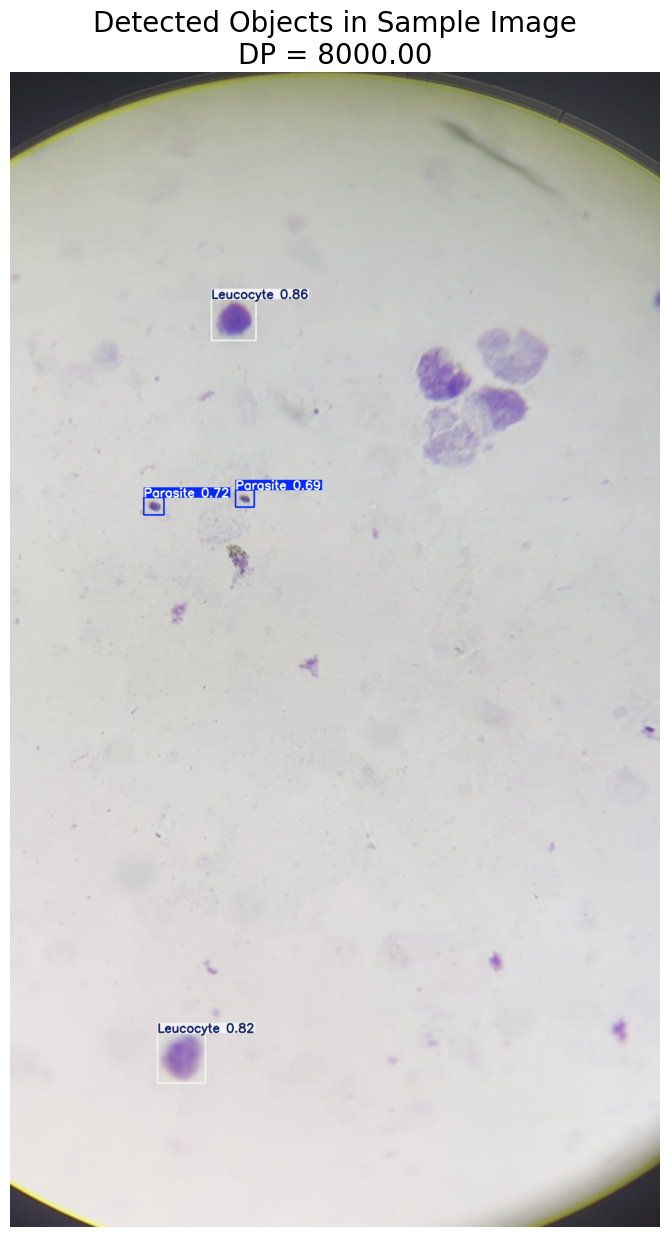

Number of parasites detected: 2
Number of leucocytes detected: 2
Parasitic Density (DP): 8000.00


In [5]:
import cv2
import matplotlib.pyplot as plt

# Path to the image file
image_path = '/kaggle/input/malaria/data/images/test/frame_174.jpg'

# Perform inference on the provided image(s)
results = model.predict(source=image_path, 
                        imgsz=640,  # Resize image to 640x640 (the size pf images the model was trained on)
                        conf=0.5)   # Confidence threshold: 50% (only detections above 50% confidence will be considered)
# Comptez le nombre de parasites et de leucocytes
parasites_count = sum(1 for result in results[0].boxes if result.cls == 0)  # Assurez-vous que 0 correspond à la classe "parasite"
leucocytes_count = sum(1 for result in results[0].boxes if result.cls == 2)  # Assurez-vous que 1 correspond à la classe "leucocyte"

# Calcul de la densité parasitaire (DP)
if leucocytes_count > 0:
    DP = (parasites_count * 8000) / leucocytes_count
else:
    DP = 0  # Pour éviter la division par zéro

# Annotate and convert image to numpy array
sample_image = results[0].plot(line_width=4)

# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display annotated image
plt.figure(figsize=(20,15))
plt.imshow(sample_image)
plt.title(f'Detected Objects in Sample Image\nDP = {DP:.2f}', fontsize=20)  # Affiche la DP dans le titre
plt.axis('off')
plt.show()

# Affichage des résultats
print(f'Number of parasites detected: {parasites_count}')
print(f'Number of leucocytes detected: {leucocytes_count}')
print(f'Parasitic Density (DP): {DP:.2f}')


image 1/1 /kaggle/input/malaria/data/images/test/frame_174.jpg: 640x384 2 Parasites, 2 Leucocytes, 15.5ms
Speed: 3.9ms preprocess, 15.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)


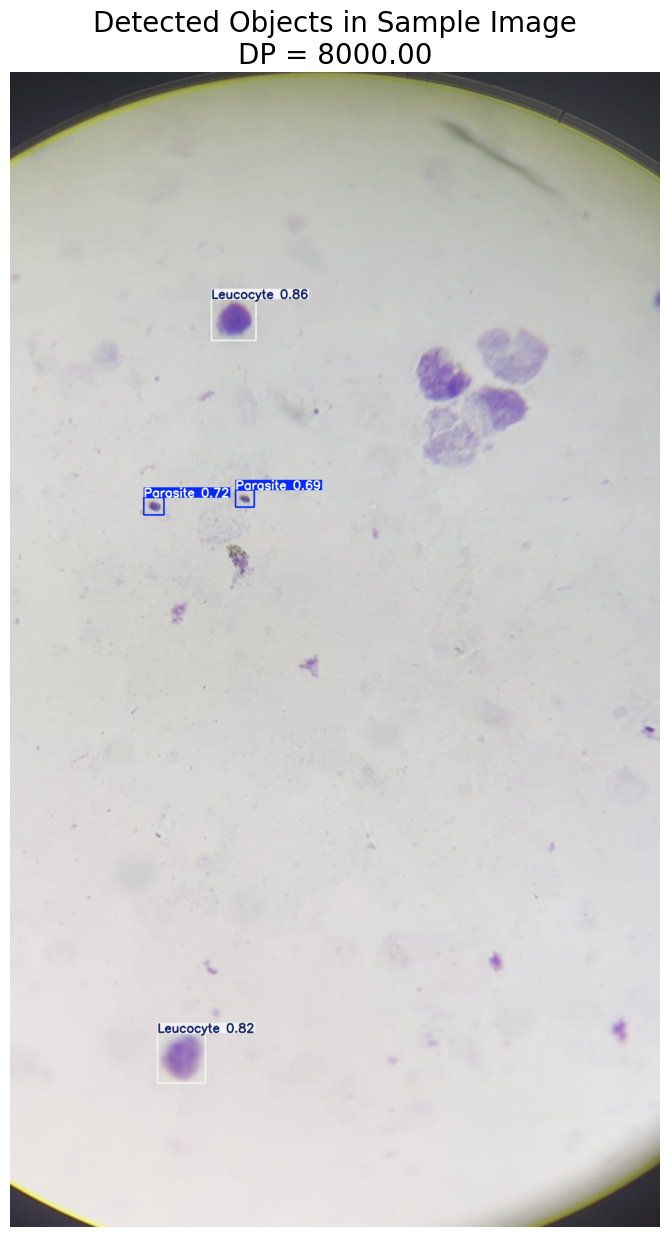

Number of parasites detected: 2
Number of leucocytes detected: 2
Parasitic Density (DP): 8000.00


In [6]:
import cv2
import matplotlib.pyplot as plt

# Path to the image file
image_path = '/kaggle/input/malaria/data/images/test/frame_174.jpg'

# Perform inference on the provided image(s)
results = model.predict(source=image_path, 
                        imgsz=640,  # Resize image to 640x640
                        conf=0.5)   # Confidence threshold: 50%

# Comptez le nombre de parasites et de leucocytes
parasites_count = sum(1 for result in results[0].boxes if result.cls == 0)  # Assurez-vous que 0 correspond à la classe "parasite"
leucocytes_count = sum(1 for result in results[0].boxes if result.cls == 2)  # Assurez-vous que 1 correspond à la classe "leucocyte"

# Calcul de la densité parasitaire (DP)
if leucocytes_count > 0:
    DP = (parasites_count * 8000) / leucocytes_count
else:
    DP = 0  # Pour éviter la division par zéro

# Annotate and convert image to numpy array
sample_image = results[0].plot(line_width=4)

# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display annotated image
plt.figure(figsize=(20,15))
plt.imshow(sample_image)
plt.title(f'Detected Objects in Sample Image\nDP = {DP:.2f}', fontsize=20)  # Affiche la DP dans le titre
plt.axis('off')
plt.show()

# Affichage des résultats
print(f'Number of parasites detected: {parasites_count}')
print(f'Number of leucocytes detected: {leucocytes_count}')
print(f'Parasitic Density (DP): {DP:.2f}')


In [8]:
metrics = model.val(data=os.path.join(ROOT_DIR, "data2.yaml"), split="test")  # Précisez le split "test" pour évaluer sur les données de test

Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/input/malaria/data/labels/test... 128 images, 19 backgrounds, 0 corrupt: 100%|██████████| 147/147 [00:01<00:00, 135.90it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/malaria/data/labels is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.87s/it]


                   all        147        417      0.764      0.859       0.86      0.557
              Parasite         59        183      0.598      0.743      0.739      0.365
             Leucocyte        107        234      0.931      0.974      0.981      0.749
Speed: 0.1ms preprocess, 3.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train2
